<a href="https://colab.research.google.com/github/Anupam0104/Loan_PrePayment/blob/main/LoanPrePayment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/Data/Loan_default.csv')
data.rename(columns={'Default': 'PrePayment'}, inplace=True)

## Data Overview

In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  PrePayment

In [ ]:
print("Unique Values per Column:\n", data.nunique())

Unique Values per Column:
 LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
PrePayment             2
dtype: int64


## EDA

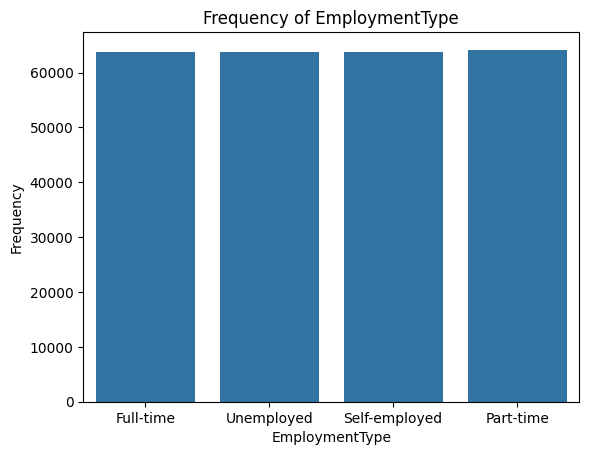

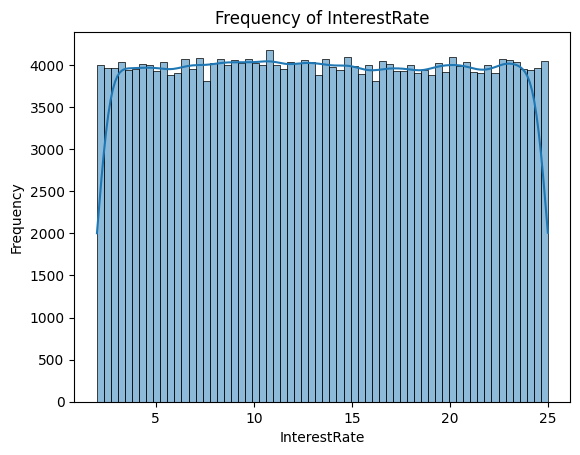

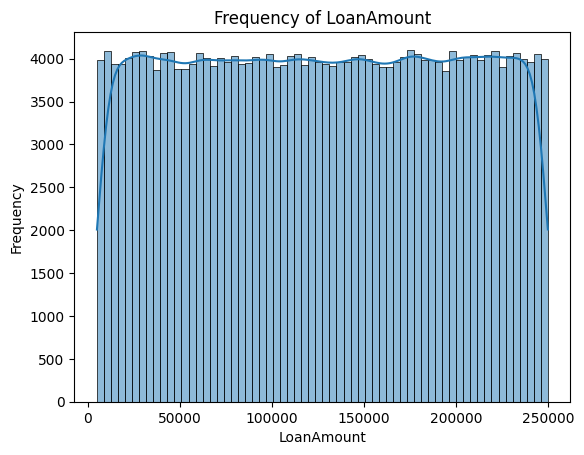

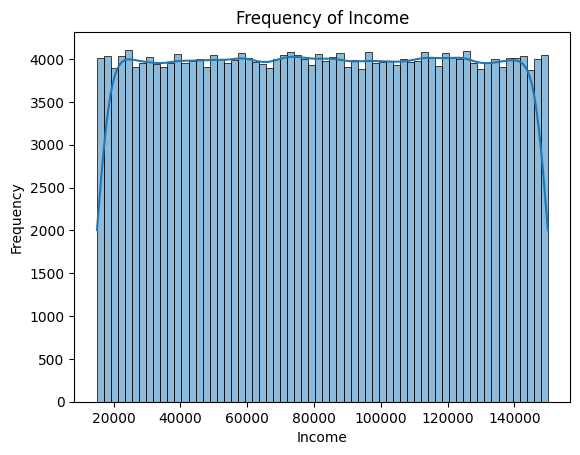

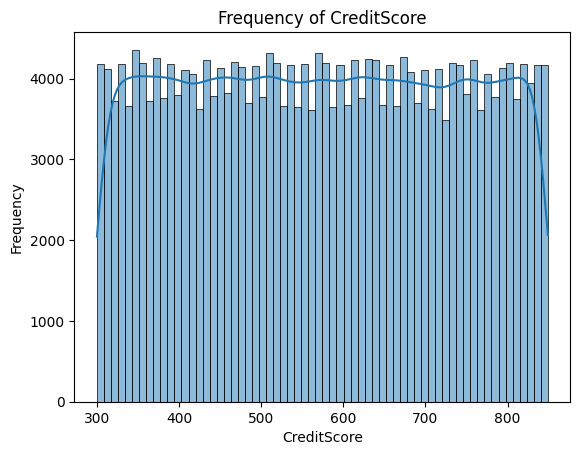

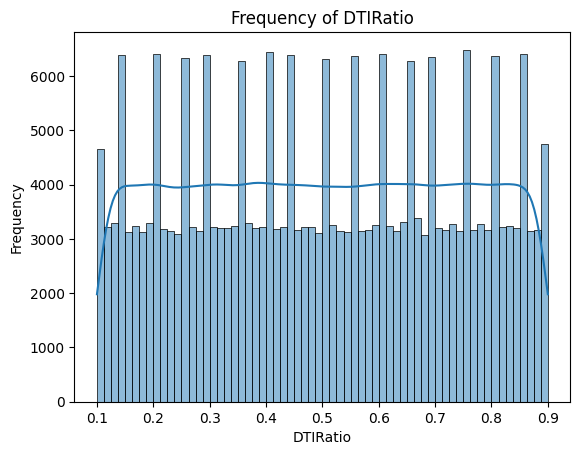

In [ ]:
columns_to_plot = ['EmploymentType', 'InterestRate', 'LoanAmount', 'Income', 'CreditScore', 'DTIRatio']
for col in columns_to_plot:
    if col == 'EmploymentType':
        sns.countplot(x=data[col])
    else:
        sns.histplot(data[col], kde=True)
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

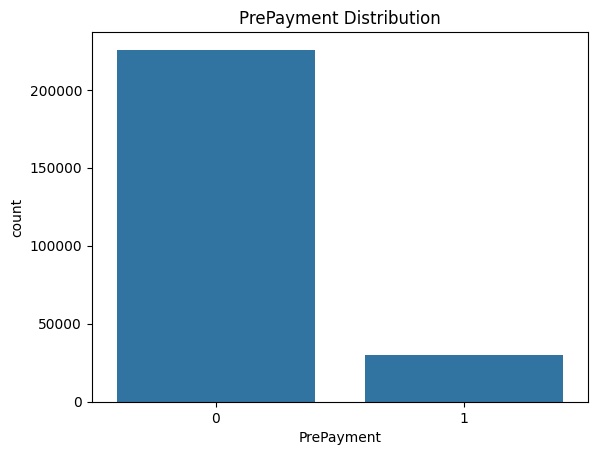

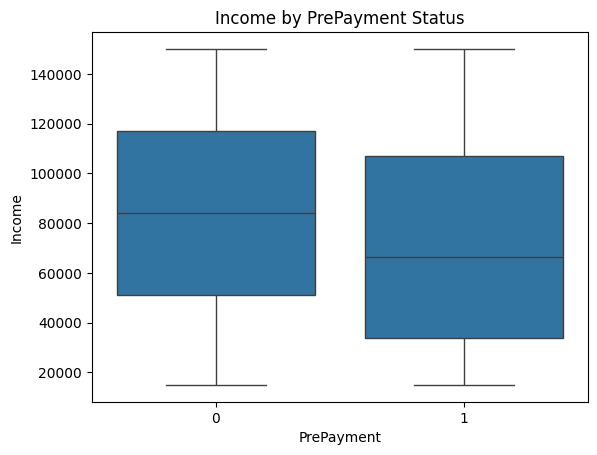

In [ ]:
# Count plot for PrePayment distribution
sns.countplot(x='PrePayment', data=data)
plt.title('PrePayment Distribution')
plt.show()

# Compare Income vs PrePayment
sns.boxplot(x='PrePayment', y='Income', data=data)
plt.title('Income by PrePayment Status')
plt.show()


##Summary statistics

In [ ]:
print(data[['LoanAmount', 'InterestRate', 'LoanTerm']].describe())
print(data['PrePayment'].value_counts(normalize=True))

          LoanAmount   InterestRate       LoanTerm
count  255347.000000  255347.000000  255347.000000
mean   127578.865512      13.492773      36.025894
std     70840.706142       6.636443      16.969330
min      5000.000000       2.000000      12.000000
25%     66156.000000       7.770000      24.000000
50%    127556.000000      13.460000      36.000000
75%    188985.000000      19.250000      48.000000
max    249999.000000      25.000000      60.000000
PrePayment
0    0.883872
1    0.116128
Name: proportion, dtype: float64


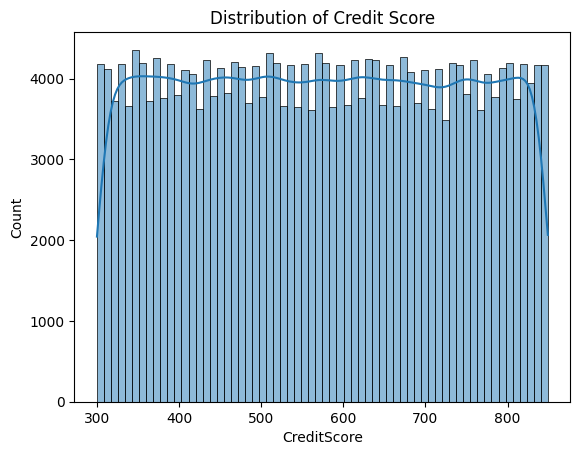

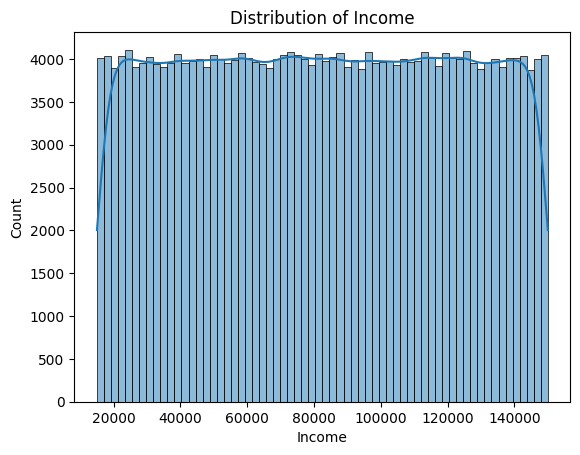

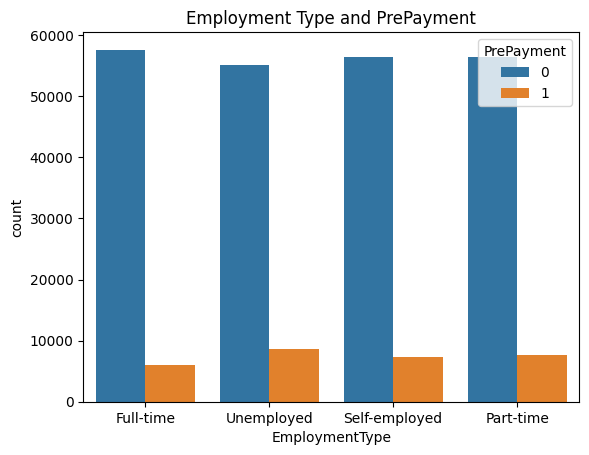

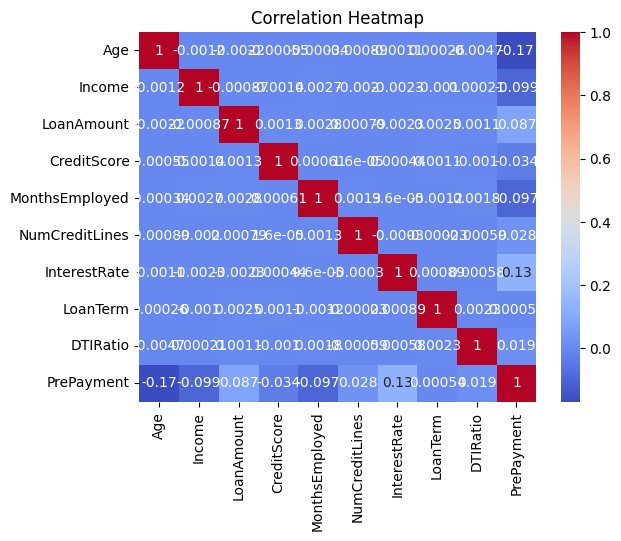

In [ ]:
sns.histplot(data['CreditScore'], kde=True)
plt.title("Distribution of Credit Score")
plt.show()

sns.histplot(data['Income'], kde=True)
plt.title("Distribution of Income")
plt.show()

sns.countplot(x='EmploymentType', hue='PrePayment', data=data)
plt.title("Employment Type and PrePayment")
plt.show()

# Select only numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



## Data Preprocessing

In [ ]:
# 5.1 No Missing Values (Skipping Imputation Step)
numerical_features = ['LoanAmount', 'InterestRate', 'LoanTerm', 'Income', 'CreditScore', 'DTIRatio']
categorical_features = ['EmploymentType']

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


## Additional check : Linearity

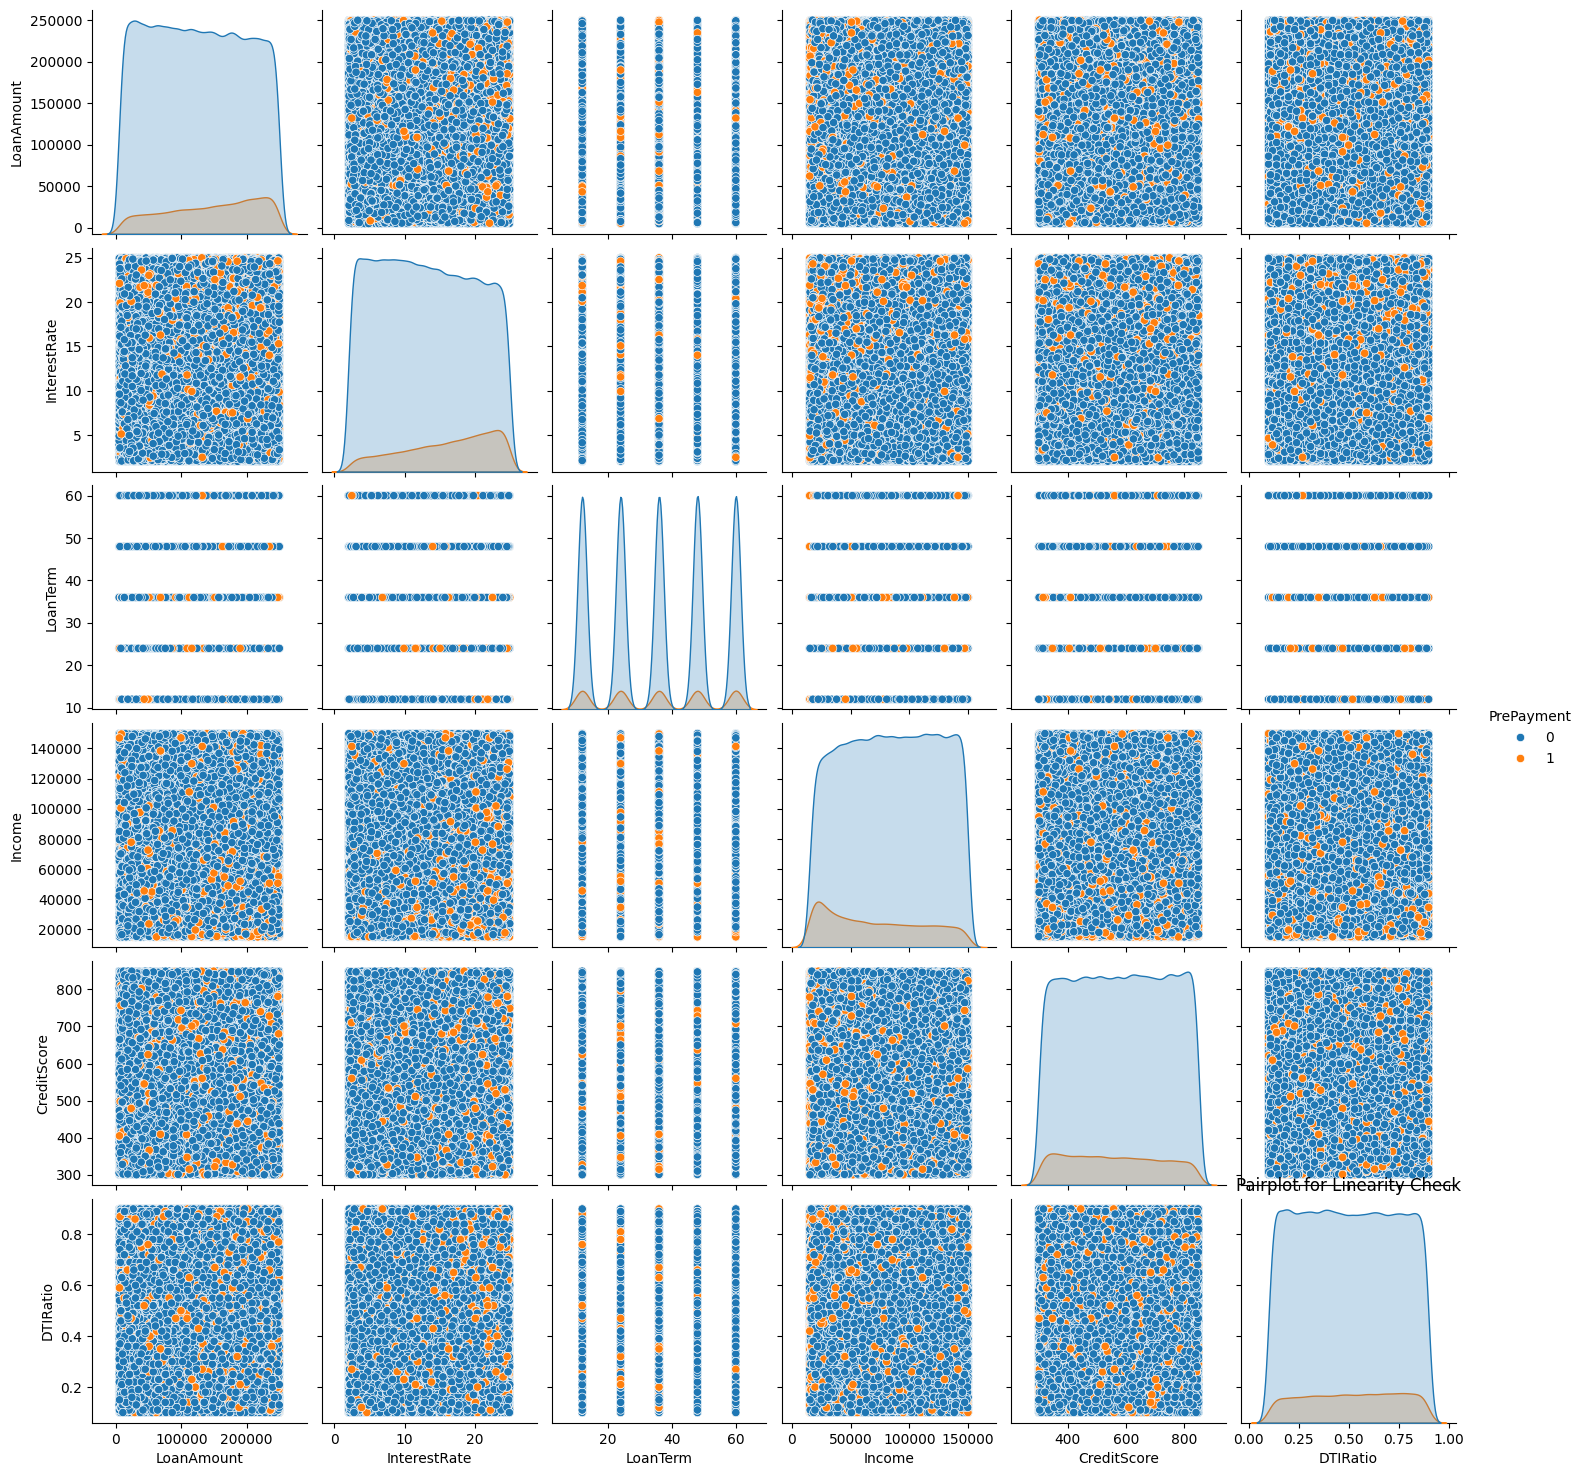

In [ ]:
# Pairplot to assess linear relationships
sns.pairplot(data, vars=numerical_features, hue="PrePayment")
plt.title("Pairplot for Linearity Check")
plt.show()

## splitting data

In [ ]:
X = data.drop(['PrePayment', 'LoanID'], axis=1)
y = data['PrePayment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Random Forest Classifier

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LoanAmount', 'InterestRate',
                                                   'LoanTerm', 'Income',
                                                   'CreditScore', 'DTIRatio']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['EmploymentType'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Metric for Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[67447   234]
 [ 8695   229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.49      0.03      0.05      8924

    accuracy                           0.88     76605
   macro avg       0.69      0.51      0.49     76605
weighted avg       0.84      0.88      0.83     76605

ROC-AUC Score: 0.6439614218455972


## ROC Curve

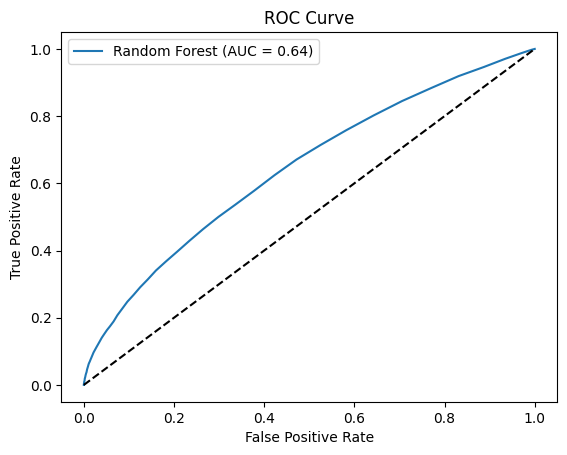

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Feature Importance

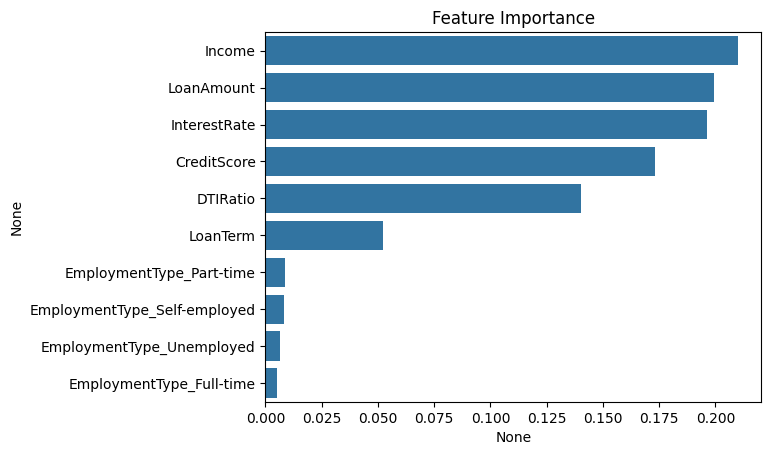

In [ ]:
rf = model.named_steps['classifier']
feature_names = numerical_features + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out())
feature_importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.show()

## Ensure Balanced Class If Needed

In [ ]:
prepayment_ratio = y.value_counts(normalize=True)
print("PrePayment Class Distribution:\n", prepayment_ratio)

PrePayment Class Distribution:
 PrePayment
0    0.883872
1    0.116128
Name: proportion, dtype: float64


## Check Multicollinearity

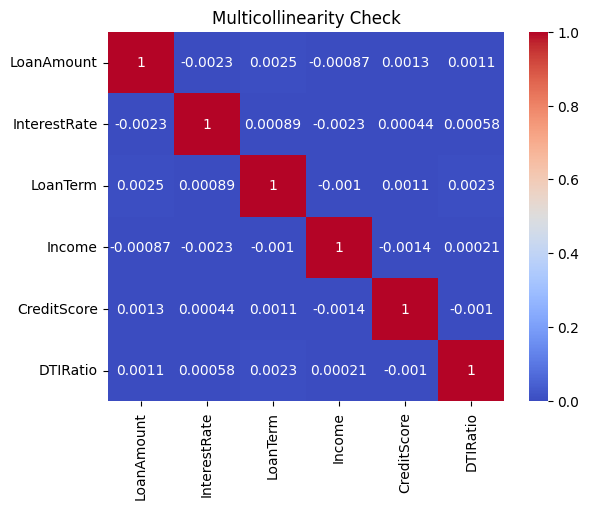

In [ ]:
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Multicollinearity Check")
plt.show()